# **Online Shoppers Purchase Intentions**

## **Import Libraries**

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import joblib

## **Step 1: Data Cleaning & Preprocessing**

In [16]:
# Load dataset
file_path = "/content/online_shoppers_intention.csv"
df = pd.read_csv(file_path)

In [17]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [18]:
# Basic Info

In [19]:
print("Shape of dataset:", df.shape)

Shape of dataset: (12330, 18)


In [20]:
print("\nColumns:", df.columns.tolist())


Columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


In [21]:
print("\nData types:\n", df.dtypes)


Data types:
 Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [22]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [23]:
df = df.dropna()

In [24]:
# Binary Encoding for Weekend & Revenue
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

In [25]:
# One-Hot Encoding for VisitorType and Month
df = pd.get_dummies(df, columns=['VisitorType'], drop_first=True, dtype=int)
df = pd.get_dummies(df, columns=['Month'], drop_first=True, dtype=int)

In [26]:
# Verify Cleaned Data
print("\nCleaned Dataset Shape:", df.shape)


Cleaned Dataset Shape: (12330, 27)


In [27]:
print("\nSample Data:\n", df.head())


Sample Data:
    Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  \
0         0.20       0.20         0.0         0.0  ...   
1         0.00       0.10         0.0         0.0  ...   
2         0.20       0.

In [32]:
# Save Cleaned Dataset
df.to_csv("cleaned_online_shoppers.csv", index=False)

## **Step 2: Exploratory Data Analysis (EDA)**

In [34]:
# Load the cleaned dataset
file_path = "cleaned_online_shoppers.csv"
df = pd.read_csv(file_path)

In [35]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,VisitorType_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0


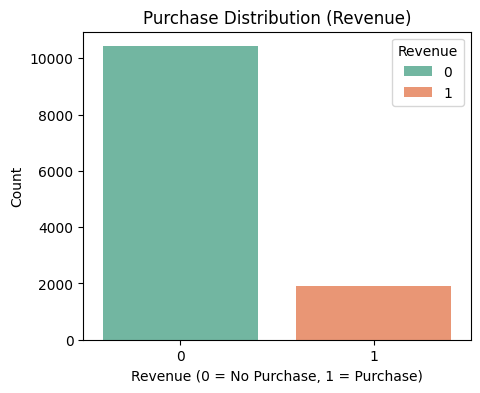


No Purchase (0): 10422 (84.5%)
Purchase (1): 1908 (15.5%)


In [58]:
# ----- 1. Basic Distribution of Target -----
plt.figure(figsize=(5,4))
sns.countplot(x='Revenue', data=df, palette='Set2', hue='Revenue', legend=True)
plt.title("Purchase Distribution (Revenue)")
plt.xlabel("Revenue (0 = No Purchase, 1 = Purchase)")
plt.ylabel("Count")
plt.show()

counts = df['Revenue'].value_counts()
percents = df['Revenue'].value_counts(normalize=True) * 100

print("\nNo Purchase (0):", counts[0], f"({percents[0]:.1f}%)")
print("Purchase (1):", counts[1], f"({percents[1]:.1f}%)")

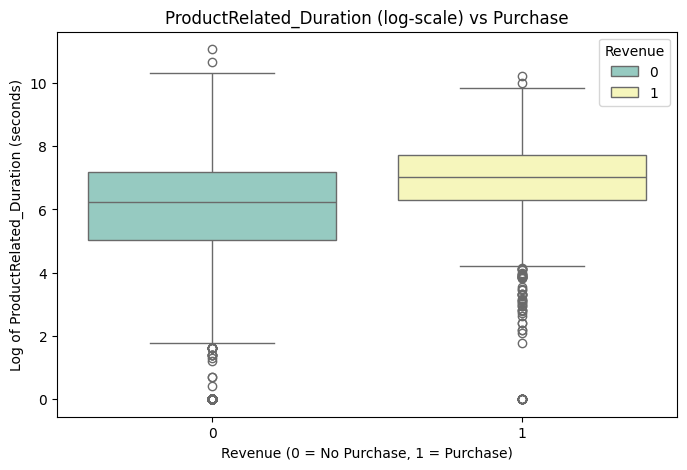


No Purchase (0) - Avg Duration: 17.83 minutes
Purchase (1) - Avg Duration: 31.27 minutes


In [62]:
# ----- 2. Compare numerical features for purchase vs. no purchase -----
plt.figure(figsize=(8,5))
sns.boxplot(x='Revenue',
            y=np.log1p(df['ProductRelated_Duration']),  # log(1+x) to handle 0
            data=df, palette='Set3', hue='Revenue')
plt.xlabel("Revenue (0 = No Purchase, 1 = Purchase)")
plt.ylabel("Log of ProductRelated_Duration (seconds)")
plt.title("ProductRelated_Duration (log-scale) vs Purchase")
plt.show()

avg_duration = df.groupby('Revenue')['ProductRelated_Duration'].mean() / 60
print(f"\nNo Purchase (0) - Avg Duration: {avg_duration[0]:.2f} minutes")
print(f"Purchase (1) - Avg Duration: {avg_duration[1]:.2f} minutes")

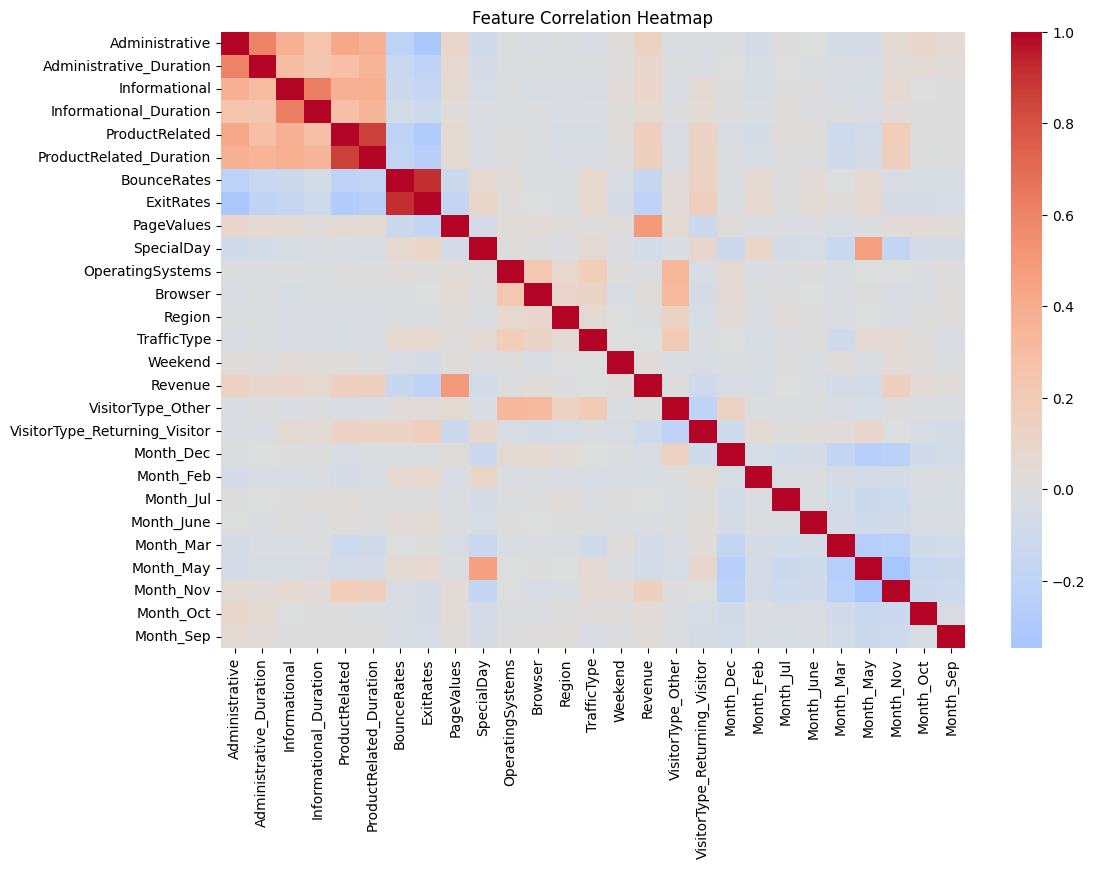

In [38]:
# ----- 3. Correlation Heatmap -----
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

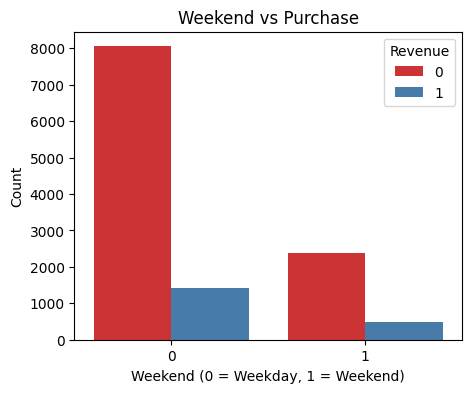


Purchase rate by Weekend:
Weekday (0): 14.89 % purchases
Weekend (1): 17.4 % purchases


In [63]:
# ----- 4. Weekend vs Purchase -----
plt.figure(figsize=(5,4))
sns.countplot(x='Weekend', hue='Revenue', data=df, palette='Set1')
plt.title("Weekend vs Purchase")
plt.xlabel("Weekend (0 = Weekday, 1 = Weekend)")
plt.ylabel("Count")
plt.legend(title="Revenue")
plt.show()

purchase_rate = df.groupby('Weekend')['Revenue'].mean()
print("\nPurchase rate by Weekend:")
print("Weekday (0):", round(purchase_rate[0]*100, 2), "% purchases")
print("Weekend (1):", round(purchase_rate[1]*100, 2), "% purchases")


Purchase rate by VisitorType_Returning_Visitor:
 VisitorType_Returning_Visitor
0    0.246206
1    0.139323
Name: Revenue, dtype: float64

Purchase rate by VisitorType_Other:
 VisitorType_Other
0    0.154512
1    0.188235
Name: Revenue, dtype: float64


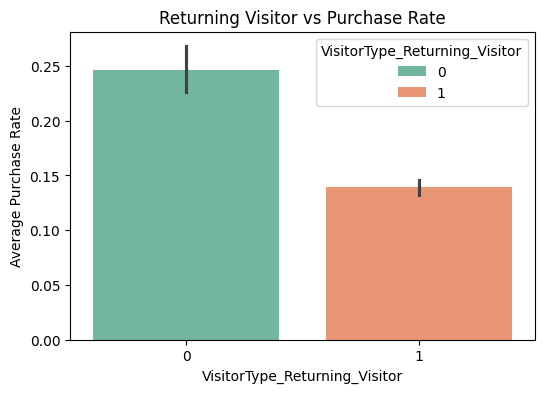


Returning visitors are more likely to make a purchase than other visitors.


In [65]:
# ----- 5. VisitorType vs Purchase -----
visitor_cols = ['VisitorType_Returning_Visitor', 'VisitorType_Other']

for col in visitor_cols:
    purchase_rate = df.groupby(col)['Revenue'].mean()
    print(f"\nPurchase rate by {col}:\n", purchase_rate)

plt.figure(figsize=(6,4))
sns.barplot(x='VisitorType_Returning_Visitor', y='Revenue', data=df, estimator='mean', palette="Set2", hue='VisitorType_Returning_Visitor',legend=True)
plt.title("Returning Visitor vs Purchase Rate")
plt.ylabel("Average Purchase Rate")
plt.show()

if df['VisitorType_Returning_Visitor'].mean() > df['VisitorType_Other'].mean():
    print("\nReturning visitors are more likely to make a purchase than other visitors.")
else:
    print("\nOther visitors are more likely to make a purchase than returning visitors.")


## **Step 3: Modeling with XGBoost**

In [67]:
# Split data
X = df.drop('Revenue', axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (9864, 26)
Testing set size: (2466, 26)


In [69]:
# Train basic XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print("\nInitial Accuracy:", accuracy_score(y_test, y_pred))


Initial Accuracy: 0.8921330089213301


In [70]:
# Hyperparameter Tuning (RandomizedSearchCV for speed)
param_dist = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # fewer for speed
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("\nBest Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Best CV Accuracy: 0.9052108678021087


<Figure size 1000x600 with 0 Axes>

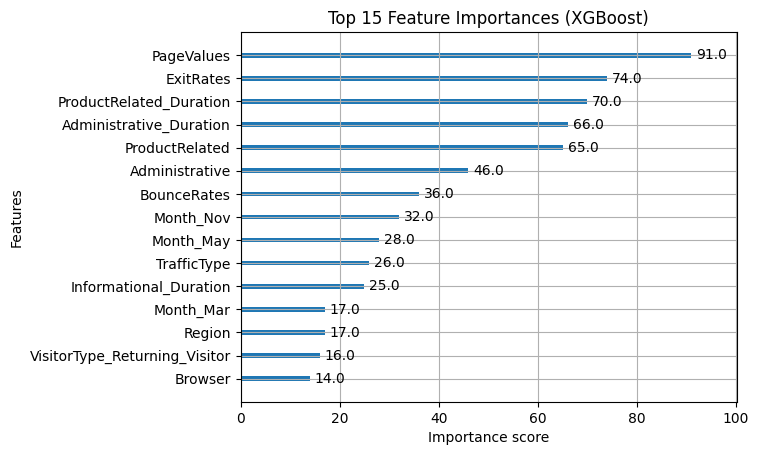

In [71]:
# Feature Importance
best_model = random_search.best_estimator_

plt.figure(figsize=(10,6))
xgb.plot_importance(best_model, importance_type='weight', max_num_features=15)
plt.title("Top 15 Feature Importances (XGBoost)")
plt.show()

## **Step 4: Model Evaluation - Accuracy**

Model Evaluation Metrics
Accuracy     : 0.8921
Precision    : 0.6824
Recall       : 0.5681
F1-Score     : 0.6200
ROC-AUC Score: 0.9196

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      2084
           1       0.68      0.57      0.62       382

    accuracy                           0.89      2466
   macro avg       0.80      0.76      0.78      2466
weighted avg       0.89      0.89      0.89      2466



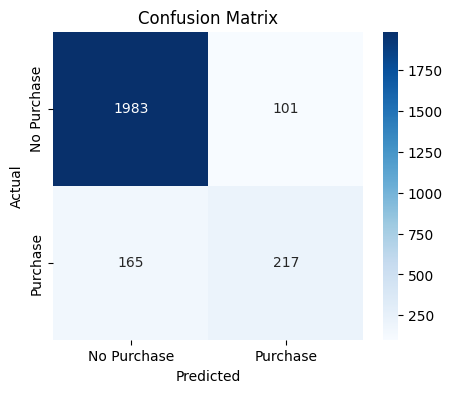

In [78]:
# ----- Get Best Model -----
try:
    best_xgb = grid_search.best_estimator_
except NameError:
    best_xgb = xgb_model

# ----- Predictions -----
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC

# ----- Metrics -----
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Model Evaluation Metrics")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1-Score     : {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ----- Confusion Matrix -----
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Purchase","Purchase"], yticklabels=["No Purchase","Purchase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [80]:
# Save the trained XGBoost model
joblib.dump(best_xgb, "xgboost_model.pkl")

['xgboost_model.pkl']